# Credit Card Fraud Detection


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



TODO:
 - Deal with imbalanced nature of dataset
 - Metrics to be used: ROC-AUC score, F1 score, Precision, Recall


## Data Exploration

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
%matplotlib inline

In [4]:
#Load dataset
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Observe available columns
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#Data types of the various columns
print(dataset.info())

#Shape of the dataset
print("Shape of dataset", dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Check for missing values
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
dataset.shape

(284807, 31)

In [7]:
#obtain a statistical summary of dataset
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# separating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]

print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [12]:
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [13]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


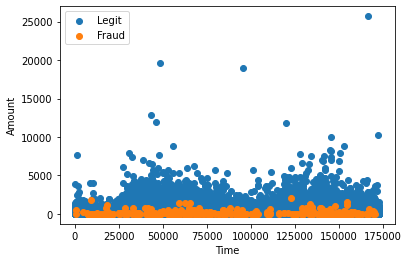

In [14]:
#scatter plot of time and amount
plt.scatter(legit.Time, legit.Amount, label = "Legit")
plt.scatter(fraud.Time, fraud.Amount, label = "Fraud")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend()
plt.show()

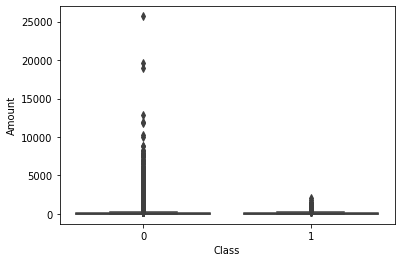

In [15]:
#box plot of time and amount
sns.boxplot(x = "Class", y = "Amount", data = dataset)
plt.show()

## Feature Correlations

<AxesSubplot:>

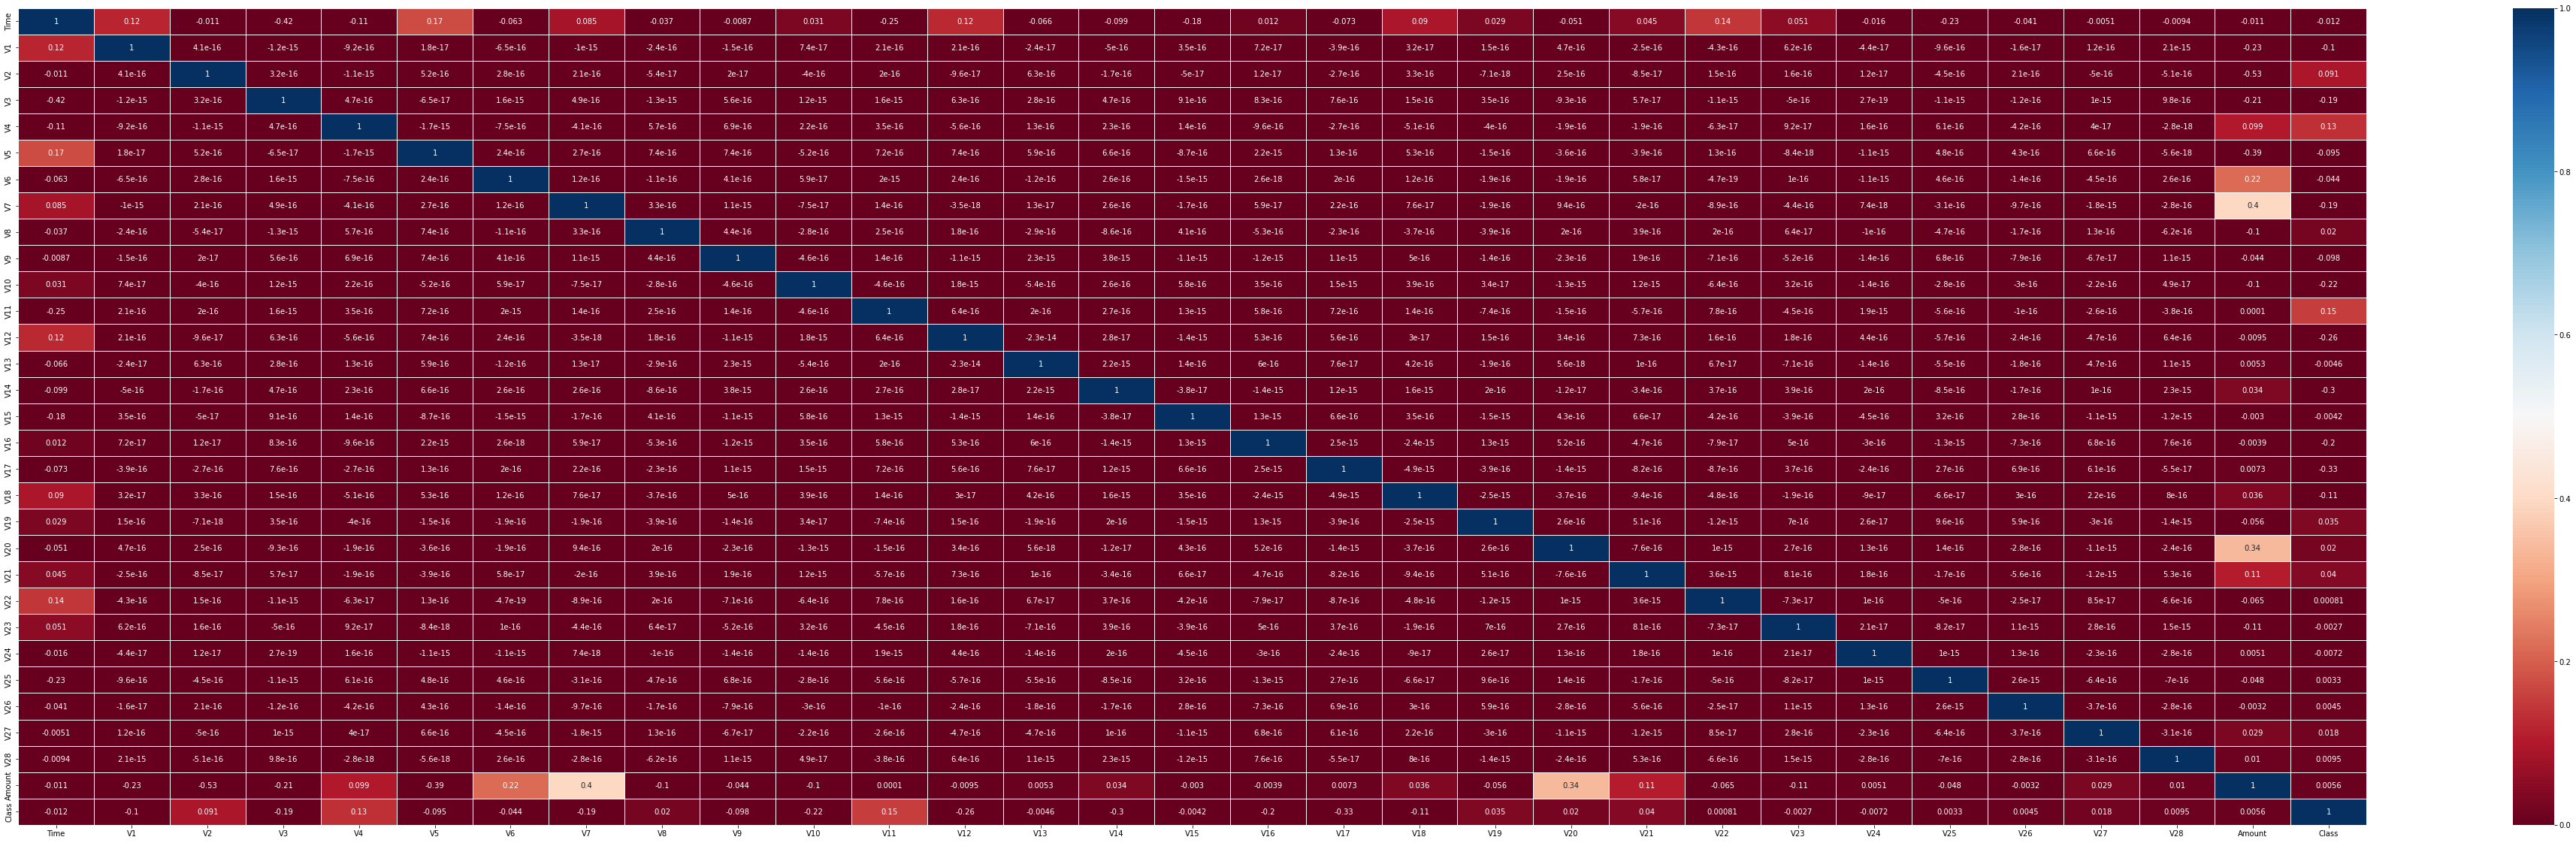

In [16]:
correlation = dataset.corr()
plt.subplots(figsize=(70, 20))
sns.heatmap(correlation, cmap="RdBu", vmin=0, vmax=1, linewidths=.5, annot=True)

## Target distribution

In [17]:
#Value counts for target
dataset["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

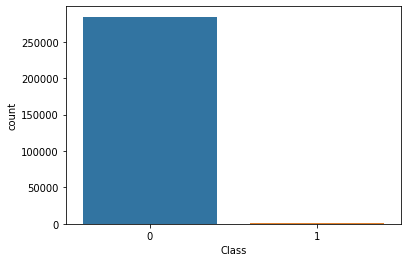

In [18]:
#bar plot of target
sns.countplot(x = "Class", data = dataset)
plt.show()

In [19]:
#Separate the features from the response variable
X = dataset.drop("Class", axis=1)
y = dataset["Class"]

In [20]:
#Shape of the current dataset after
X.shape, y.shape

((284807, 30), (284807,))

## Dealing with Imbalanced nature of Target Variable

Performing undersampling for the abundant class

In [21]:
#instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

#Under sample abundant class, and reassign to X, y 
X_resampled, y_resampled = rus.fit_resample(X, y)

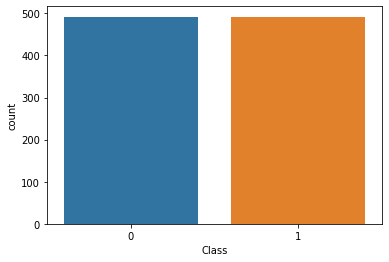

In [22]:
#bar plot of target
sns.countplot(x = y_resampled, data = dataset)
plt.show()

## Data Splitting

Splitting into 80: 20 train test size

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

## Feature Scaling



In [25]:
#Scale the "Amount" column in the dataset
scaler = RobustScaler()

#Transform train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])
X_train[["Time"]] = scaler.fit_transform(X_train[["Time"]])

#Transform test data
X_test[["Amount"]] = scaler.fit_transform(X_test[["Amount"]])
X_test[["Time"]] = scaler.fit_transform(X_test[["Time"]])

## Data Distribution

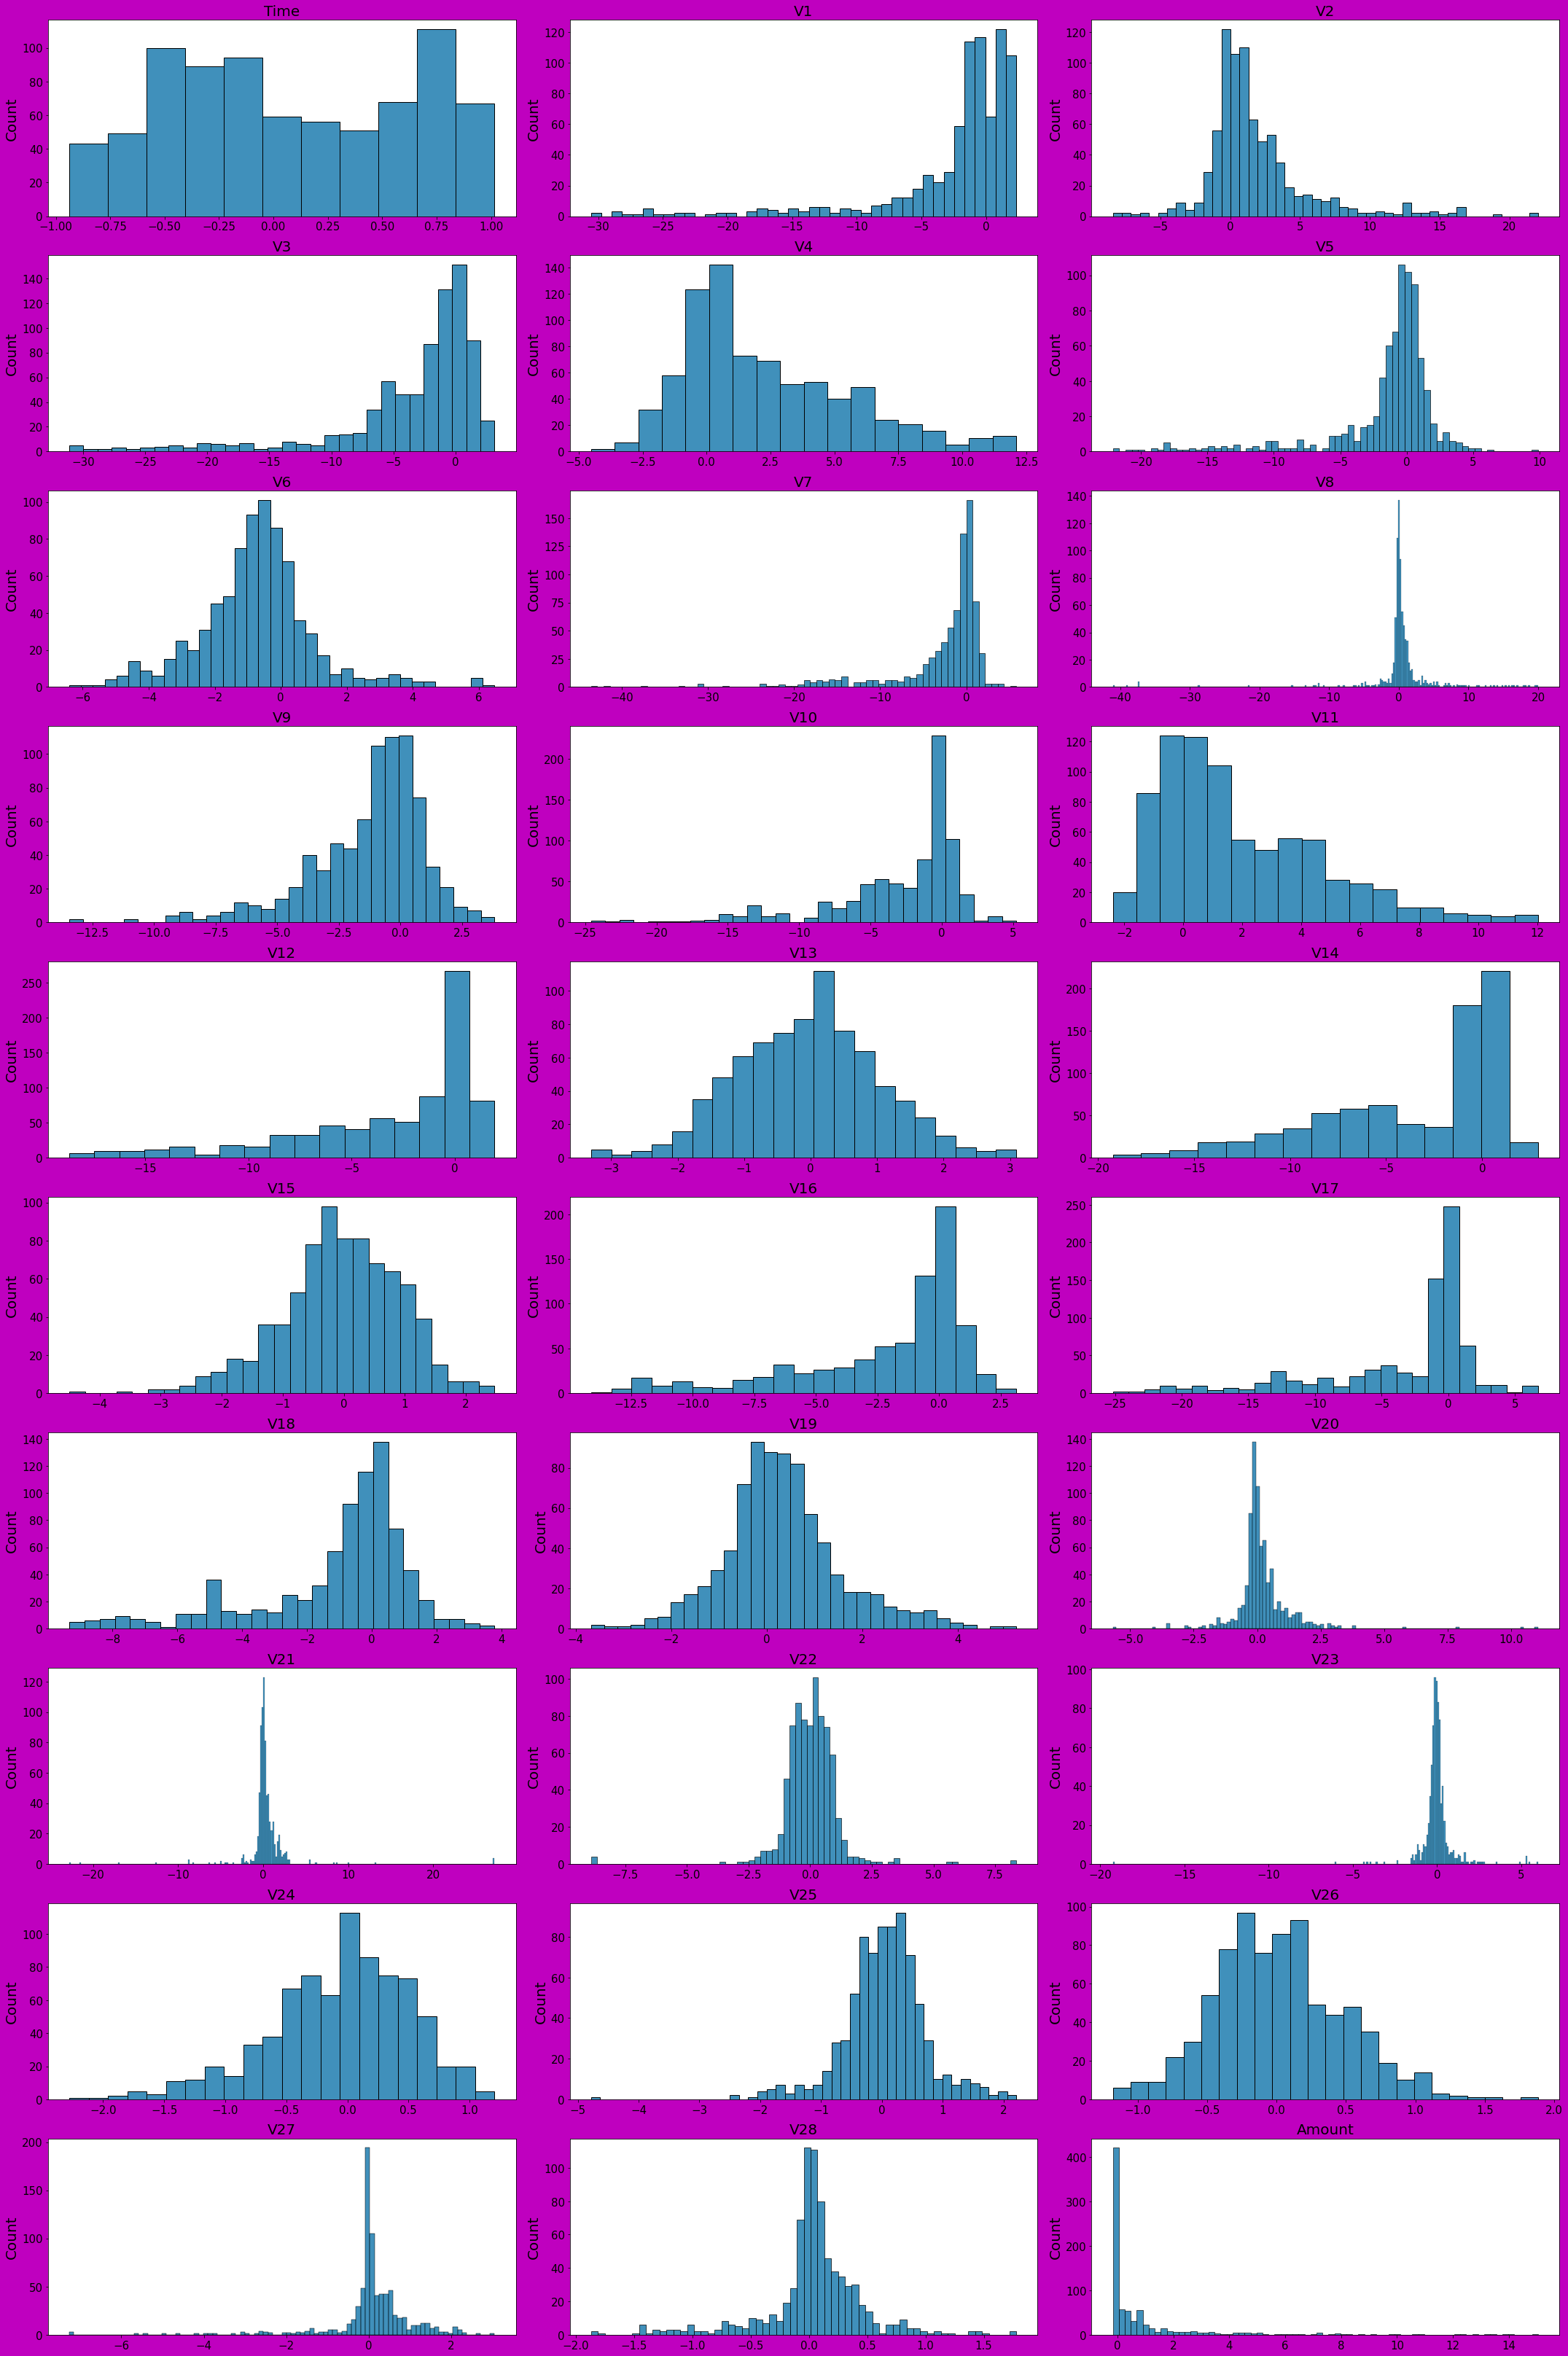

In [26]:
#Observe the skewness in each of the features
var = X_train.columns

with plt.style.context('tableau-colorblind10'):
    fig, axes = plt.subplots(10, 3, figsize=(30, 45), facecolor='m')
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(var):
            sns.histplot(X_train[var[i]], ax=ax)
            ax.set_title(var[i], fontsize=20) 
            ax.set_ylabel("Count", fontsize=20)  # set ylabel of the subplot
            ax.tick_params(axis='both', labelsize=15) 
            ax.set_xlabel('') # set empty string as x label of the subplot

    plt.tight_layout()
    plt.show()

## Normalize dataset
Note: A perfectly symmetrical data set will have a skewness of 0.   The normal distribution has a skewness of 0.

In [27]:
skewness_values = []

for col in X_train.columns:
  skewness_values.append(X_train[col].skew())

#Present skewness data in the simple dataframe
df = pd.concat([pd.DataFrame(X_train.columns, columns=["Features"]), pd.DataFrame(skewness_values, columns=["Skewness"])], axis= 1)
df



,Features,Skewness
0,Time,0.066865
1,V1,-2.659031
2,V2,1.909303
3,V3,-2.219322
4,V4,0.852541
5,V5,-2.374169
6,V6,0.385301
7,V7,-2.863627
8,V8,-3.612960
9,V9,-1.360385


In [28]:
#Apply PowerTransform
pt = PowerTransformer()

#fit transformer to X_train
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [38]:
X_train_pt.shape, y_train_pt.shape

((787, 30), (787,))

## Data Modelling

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Predicitons

In [40]:
classifier = RandomForestClassifier(verbose=0, n_jobs=-1, random_state=42)

In [41]:
classifier.fit(X_train_pt, y_train_pt)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [42]:
y_pred = classifier.predict(X_test_pt)

In [43]:
print("Accuracy Score: ", accuracy_score(y_test_pt, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test_pt, y_pred))

Accuracy Score:  0.9238578680203046
Confusion Matrix: 
 [[95  4]
 [11 87]]


In [44]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [45]:
cvs = cross_val_score(classifier,X=X_train, y=y_train, scoring='average_precision')

In [46]:
print(f'Using {len(cvs)} trials:\n {cvs}')
print(f'Average:{np.mean(cvs)}')

Using 5 trials:
 [0.98816438 0.98819474 0.97391322 0.97738249 0.99164793]
Average:0.9838605485128067


In [47]:
cvs = cross_validate(classifier,X=X_train, y=y_train, scoring=['accuracy','average_precision','balanced_accuracy','f1','precision','recall','roc_auc'])

In [48]:
for k, v in cvs.items():
    print(f'{k.replace("test_",""):23}{v}   Avg:{"":4}{np.mean(v):.2f}' )

fit_time               [0.19099903 0.13873887 0.18421769 0.15500021 0.1765132 ]   Avg:    0.17
score_time             [0.06019378 0.08156323 0.06481791 0.05840349 0.0599978 ]   Avg:    0.06
accuracy               [0.96202532 0.94303797 0.91719745 0.92993631 0.94904459]   Avg:    0.94
average_precision      [0.98816438 0.98819474 0.97391322 0.97738249 0.99164793]   Avg:    0.98
balanced_accuracy      [0.96202532 0.94303797 0.91755923 0.93013632 0.94888023]   Avg:    0.94
f1                     [0.96103896 0.94039735 0.91275168 0.92810458 0.94736842]   Avg:    0.94
precision              [0.98666667 0.98611111 0.97142857 0.95945946 0.97297297]   Avg:    0.98
recall                 [0.93670886 0.89873418 0.86075949 0.89873418 0.92307692]   Avg:    0.90
roc_auc                [0.98477808 0.98429739 0.96527102 0.96738072 0.99091204]   Avg:    0.98


In [49]:
from scipy.stats import randint as sp_rand_int

param_grid = {'max_depth': sp_rand_int(5, 30),'max_features': sp_rand_int(5, 30),
              'n_estimators': sp_rand_int(100, 500),'min_samples_split': sp_rand_int(2, 5)}
clf = RandomForestClassifier(n_jobs=-1, verbose=1, oob_score=True)
clf_cv = RandomizedSearchCV(classifier, param_grid, scoring="average_precision",
                            n_jobs=-1, verbose=1, n_iter=10)


In [50]:
clf_cv.fit(X_train_pt, y_train_pt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025DEC7F6D40>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025DFCDF63B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025DEC7842B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025DED9186A0>},
                   scoring='average_precision', verbose=1)

In [52]:
#predict on test data
y_pred = clf_cv.predict(X_test_pt)

print("Accuracy Score: ", accuracy_score(y_test_pt, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test_pt, y_pred))

Accuracy Score:  0.9187817258883249
Confusion Matrix: 
 [[94  5]
 [11 87]]


In [53]:
#display best parameters and score
print("Best Parameters: ", clf_cv.best_params_)
print("Best Score: ", clf_cv.best_score_)

Best Parameters:  {'max_depth': 28, 'max_features': 7, 'min_samples_split': 4, 'n_estimators': 226}
Best Score:  0.9844592625158904


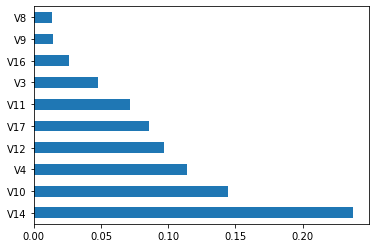

In [54]:
#plot feature importance
feature_importance = pd.Series(clf_cv.best_estimator_.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()